# Random Forest Classifier - Breast Cancer

In [2]:
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


In [4]:
# General config of pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.expand_frame_repr', False)

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = datasets.load_breast_cancer()

# Retrieving features from the datasets
print(f"Features: {cancer.feature_names}\n")
print(f"Target: {cancer.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


### Creating the pandas dataframe

In [6]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Adding the target column into the dataframe [0: malignant (bad), 1: benign (Not bad)]
df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Split

In [8]:
X = df.drop(columns=["target"])
y = df["target"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Train features shape: {X_train.shape}, Train target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}, Test target shape: {y_test.shape}")

Train features shape: (455, 30), Train target shape: (455,)
Test features shape: (114, 30), Test target shape: (114,)


### Training Phase

In [9]:
# Instatiating the model
model = RandomForestClassifier(n_estimators=8,
                              n_jobs=-1)

# Fitting the model for training
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8, n_jobs=-1)

### Model's evaluation 


In [11]:
# Checking how well the model performed in training
model.score(X_train, y_train)

0.9978021978021978

In [12]:
# Checking how well the model performed in test
model.score(X_test, y_test)

0.9473684210526315

In [13]:
# Making prediction with the trained model
y_hat = model.predict(X_test)

### Confusion Matrix

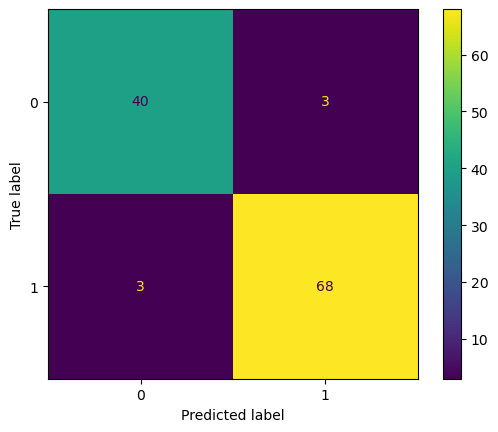

In [16]:
# Confusion Matrix first version with matplotlib.pyplot

cm = metrics.confusion_matrix(y_test,y_hat, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

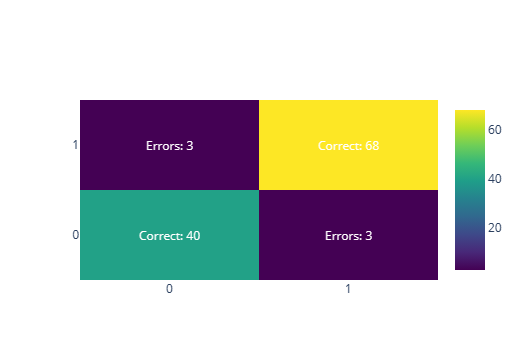

In [17]:
# Confusion Matrix second version with plotly.express

# Create the heatmap trace
heatmap = go.Heatmap(z=cm, x=model.classes_, y=model.classes_, colorscale='Viridis')

# Create the figure and add the heatmap trace
fig = go.Figure(data=[heatmap])

# Add annotations for each cell in the confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            text = f"Correct: {cm[i][j]}"
        else:
            text = f"Errors: {cm[i][j]}"
        fig.add_annotation(
            text=text,
            x=model.classes_[j],
            y=model.classes_[i],
            xref='x',
            yref='y',
            showarrow=False,
            font=dict(color='white')  # Ensure text color is white for better visibility
        )

# Update axis properties
fig.update_xaxes(title_text='Predicted Label', tickmode='array', tickvals=list(range(len(model.classes_))), ticktext=model.classes_)
fig.update_yaxes(title_text='True Label', tickmode='array', tickvals=list(range(len(model.classes_))), ticktext=model.classes_)

# Set the layout to ensure the figure is square
fig.update_layout(
    width=600,  # Set the width of the figure
    height=600  # Set the height of the figure to be equal to the width
)

# Show the figure
fig.show()

### Important Features

In [18]:
# With Decision Tree you can check what are the important features that have more impact when the model try to predict 

model.feature_importances_

array([0.06878542, 0.01461545, 0.07102921, 0.01844879, 0.00767373,
       0.00777169, 0.01141494, 0.01843126, 0.00278624, 0.00105892,
       0.02048247, 0.00579222, 0.00349379, 0.        , 0.00108532,
       0.0043214 , 0.04557628, 0.00308512, 0.00472529, 0.00445337,
       0.32220351, 0.0159635 , 0.00770919, 0.11191973, 0.00678783,
       0.02241652, 0.03426687, 0.14681958, 0.01462658, 0.00225581])

In [19]:
# Creating a DataFrame with the important features

feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train)), 
                           columns=["Value","Feature"])

feature_imp

,Value,Feature
0,0.000000,area error
1,0.001059,mean fractal dimension
2,0.001085,smoothness error
3,0.002256,worst fractal dimension
4,0.002786,mean symmetry
5,0.003085,concave points error
6,0.003494,perimeter error
7,0.004321,compactness error
8,0.004453,fractal dimension error
9,0.004725,symmetry error


### Visualization 
- Importances Features
- Tree designed after training

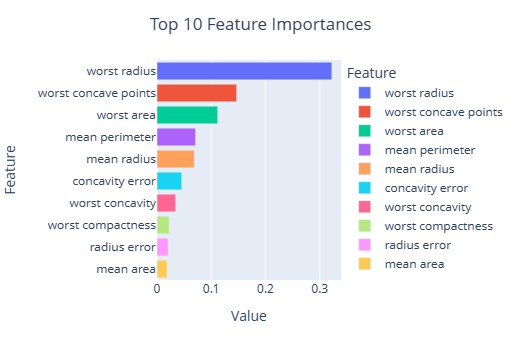

In [21]:
# Plotting the 10 more importance features

fig = px.bar(feature_imp.sort_values(by="Value", ascending=False).head(10), 
             x="Value", y="Feature", orientation="h", color="Feature")

fig.update_layout(title="Top 10 Feature Importances", title_x=0.5)
fig.show()

In [22]:
# retrieving the 1st Tree

model_tree = model.estimators_[0]

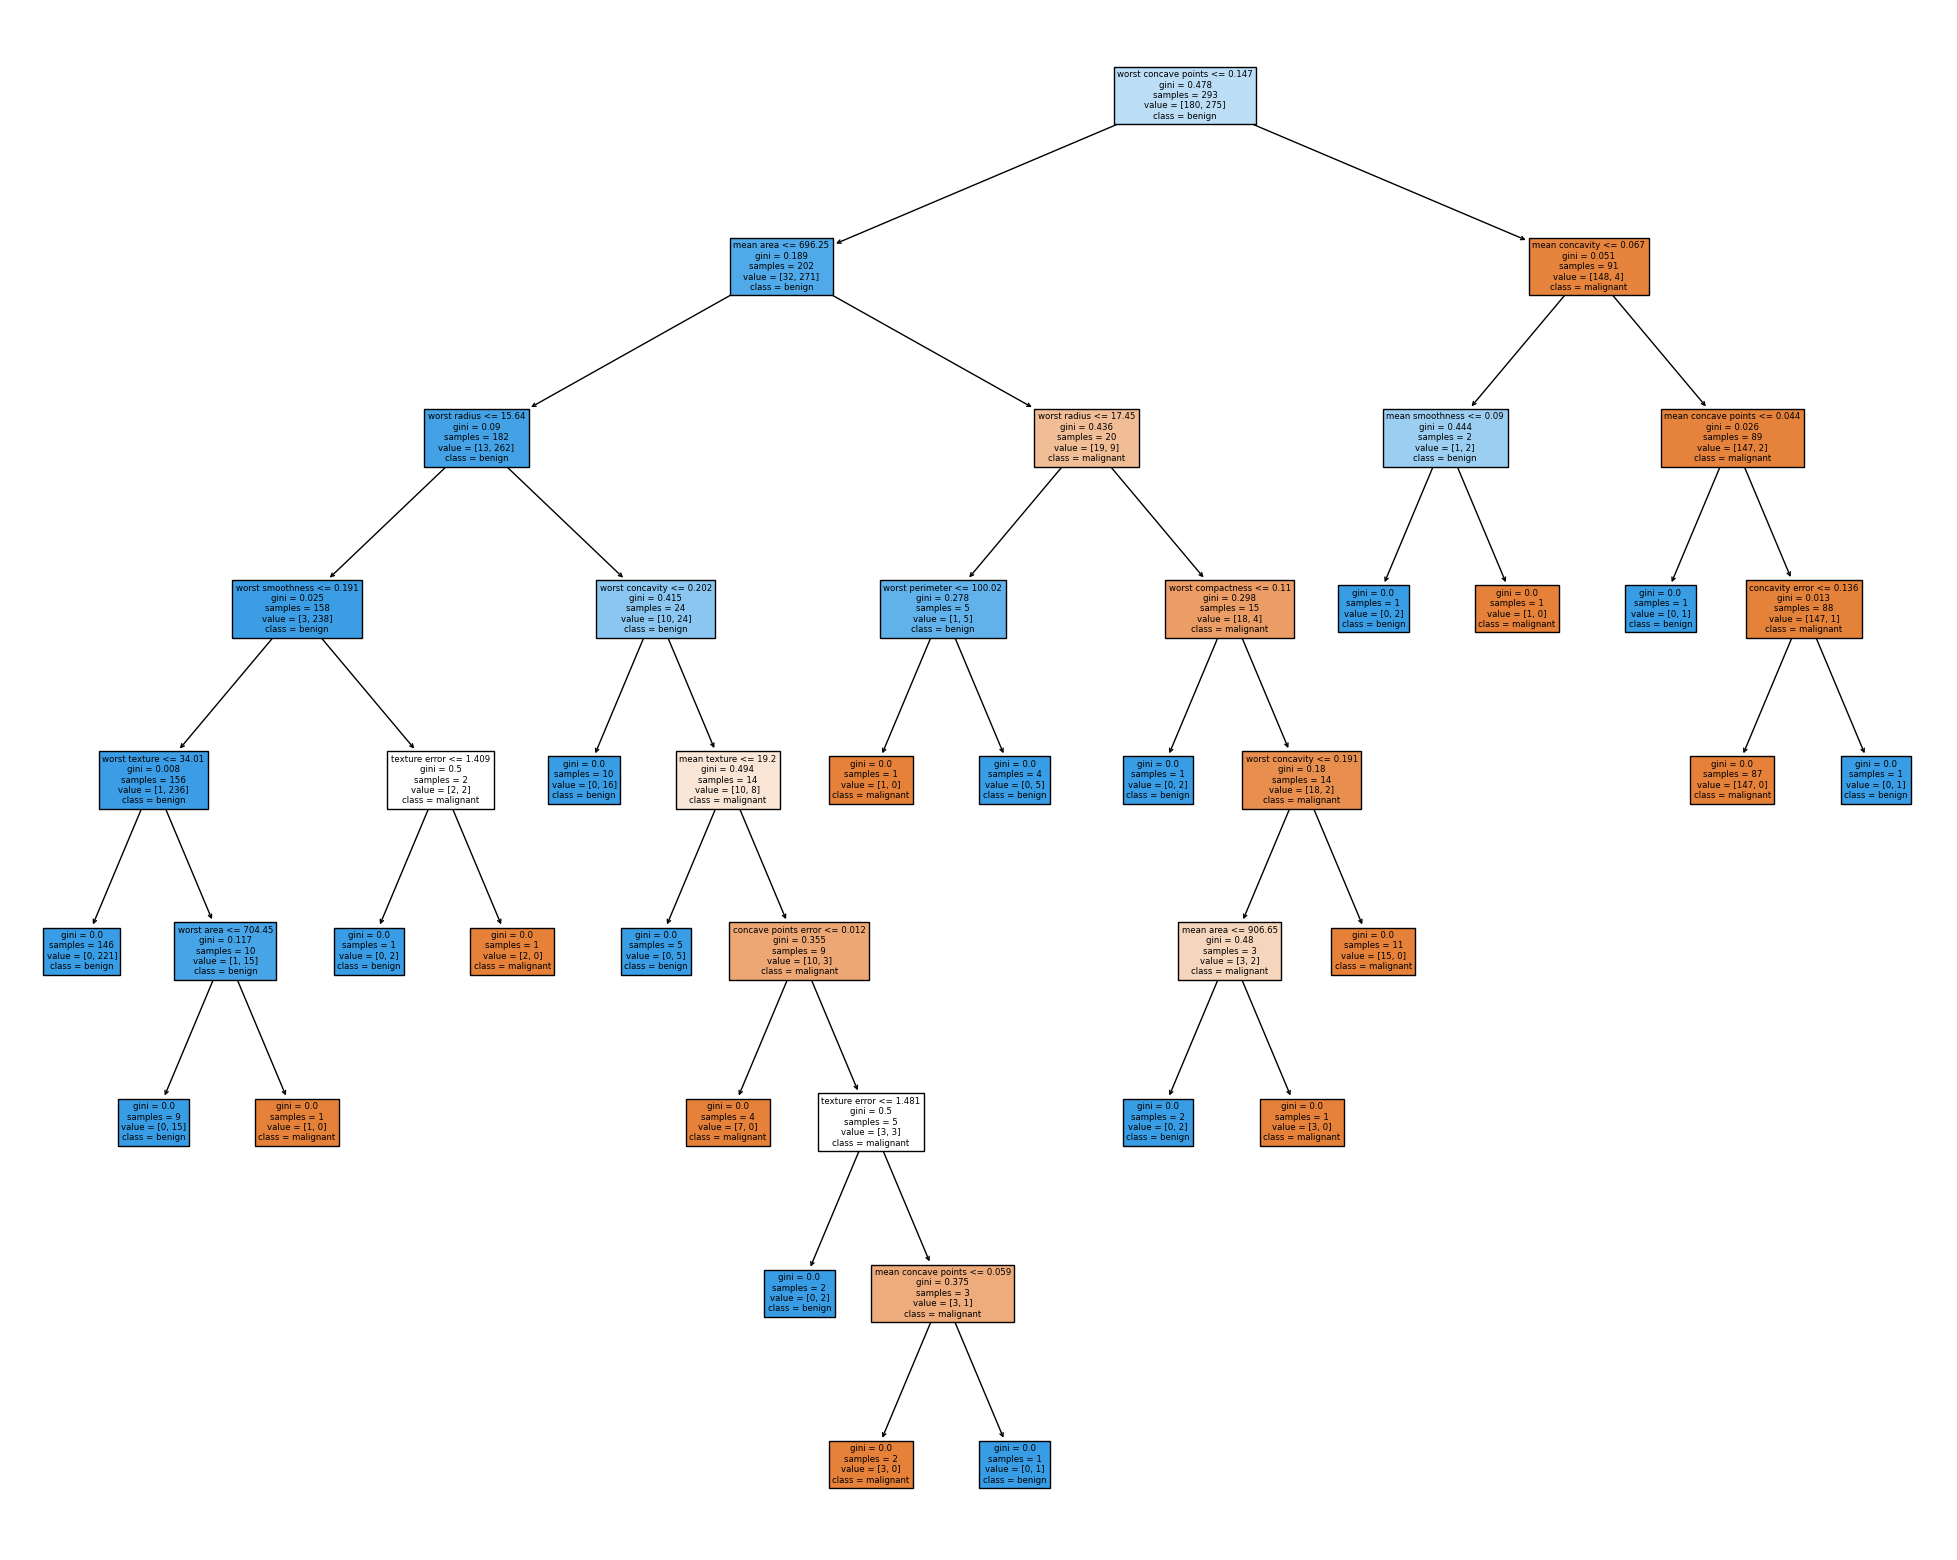

In [24]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model_tree,
                   feature_names=cancer.feature_names.tolist(),  
                   class_names=cancer.target_names.tolist(),
                   filled = True)

**Analysis:** 
As you can see in the metrics obtained in previous cells, the performace of this model in training is higher than the performance this model obtain in test phase, this might be due a overfitting, we need to check what else we can do in order to avoid this behavior